# How to Represent Quantum Gates
## Example: Pauli X gate

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

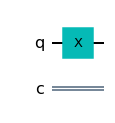

In [2]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)

%matplotlib inline
circuit.draw(output='mpl')

## 1. Bra-Ket notation (Dirac notation)
$$ \text{X} \left|0\right\rangle  = \left|1\right\rangle $$ 

$$ \text{X} \left|1\right> = \left|0\right> $$

## 2. Unitary matrix
$$ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

$$ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$

In [3]:
unitary_sim = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=unitary_sim).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


## 3. Bloch sphere (state vector)

[0.+0.j 1.+0.j]


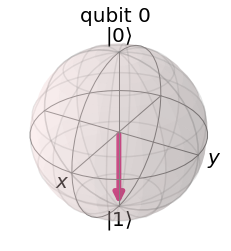

In [4]:
statevector_sim = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=statevector_sim).result()
statevector = result.get_statevector()
print(statevector)

plot_bloch_multivector(statevector)

## 4. Measurement

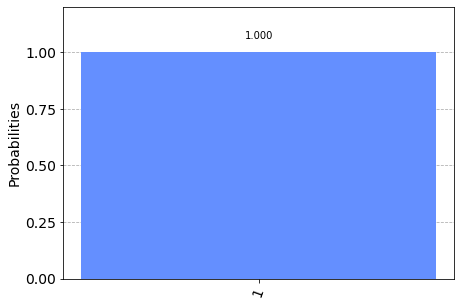

In [5]:
circuit.measure([0], [0])

qasm_sim = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)